<a href="https://colab.research.google.com/github/aniketmishr/NeuralNetwork/blob/main/Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def load_data():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [17]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [18]:
def sigmoid(z):
  return 1/(1+np.exp(-z)),z

def d_sigmoid(z):
  a = 1/(1+np.exp(-z))
  return a*(1-a)

def tanh(z):
  return (2*(sigmoid(2*z)) - 1),z

def d_tanh(z):
  a = tanh(z)
  return 1-(a**2)

def relu(z):
  return np.maximum(0,z),z

def d_relu(z):
  return np.where(z > 0, 1, 0)

In [19]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = relu(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [20]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
        ### END CODE HERE ###

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

In [21]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    ### END CODE HERE ###

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

In [22]:
def linear_backward(dZ, cache):
    # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [23]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = dA*d_relu(activation_cache)
        ### END CODE HERE ###

    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = dA*d_sigmoid(activation_cache)
        ### END CODE HERE ###

    ### START CODE HERE ### (≈ 1 line of code)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    ### END CODE HERE ###

    return dA_prev, dW, db

In [24]:

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [25]:


# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters



In [26]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


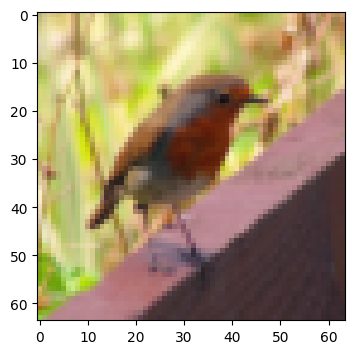

In [27]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [28]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [29]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [30]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###

        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###

        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###

        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [31]:
def predict(X,y,parameters):
  AL,cache = L_model_forward(X,parameters)
  pred = np.where(AL>0.5,1,0)
  return pred
def accuracy(predictions, y):
    correct_predictions = np.sum(predictions == y)
    total_predictions = y.shape[1]
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

## Two layer Neural Network

In [32]:

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)


Cost after iteration 0: 0.692380
Cost after iteration 100: 0.646159
Cost after iteration 200: 0.631775
Cost after iteration 300: 0.600091
Cost after iteration 400: 0.559427
Cost after iteration 500: 0.512988
Cost after iteration 600: 0.454815
Cost after iteration 700: 0.399388
Cost after iteration 800: 0.420515
Cost after iteration 900: 0.369184
Cost after iteration 1000: 0.362393
Cost after iteration 1100: 0.341366
Cost after iteration 1200: 0.333344
Cost after iteration 1300: 0.263797
Cost after iteration 1400: 0.164805
Cost after iteration 1500: 0.143608
Cost after iteration 1600: 0.124467
Cost after iteration 1700: 0.706752
Cost after iteration 1800: 0.092394
Cost after iteration 1900: 0.078572
Cost after iteration 2000: 0.068092
Cost after iteration 2100: 0.059649
Cost after iteration 2200: 0.052619
Cost after iteration 2300: 0.046817
Cost after iteration 2400: 0.041928


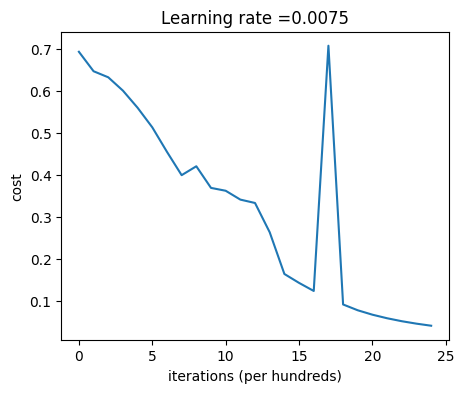

In [33]:

parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [34]:


pred_train = predict(train_x, train_y, parameters)

print("Accuracy: "+ str(accuracy(pred_train,train_y)))

Accuracy: 100.0


<ipython-input-18-222426e756b7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z)),z


Oops it's not a cat


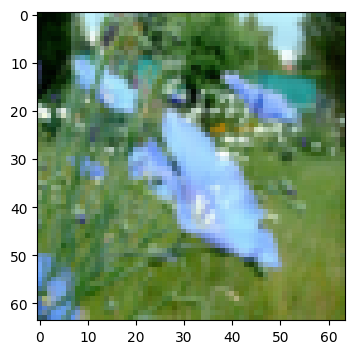

In [71]:

test_image = train_x_orig[20]
plt.imshow(test_image)
test_predict = predict(test_image.reshape(12288,1), None,parameters)
if (test_predict[0][0] == 1):
  print("Its a cat\n")
else:
  print("Oops it's not a cat")

In [ ]:


test_predict = predict(test_image.reshape(12288,1)+50, None,parameters)
acc = accuracy(test_predict, np.array(1).reshape(1,1))
if (test_predict[0][0] == 1):
  print(f"Its a cat with {acc} % accuracy")
else:
  print("Oops it's not a cat")

Its a cat with 100.0 % accuracy


# Generalized Cat image by NN classifier


In [ ]:
class NeuralNetwork:
  def __init__(self,n_l,lr,g,epochs,parameters,nx,y):
    self.n_l = n_l
    self.nx=nx
    self.L = len(n_l)
    self.lr = lr
    self.g, self.d_g = self.get_activation(g)
    self.epochs = epochs

    self.X = np.array(np.random.randn(self.nx,1))
    self.y = np.array(y)
    self.w = parameters[0]
    self.b = parameters[1]
    self.Z= [None]*self.L
    self.A = [None]*self.L
    self.dA = [None]*self.L
    self.dz = [None]*self.L
    self.dX = [None]
    self.cost = []

    self.gradient_descent()

  def get_activation(self,g):
    gx = [] #activation fucntions
    d_gx = [] # derivative of activation fucntions
    for s in g:
      if s=="tanh":
        gx.append(self.tanh)
        d_gx.append(self.d_tanh)
      elif s=="sigmoid":
        gx.append(self.sigmoid)
        d_gx.append(self.d_sigmoid)
      elif s=="relu":
         gx.append(self.relu)
         d_gx.append(self.d_relu)
      else:
        print("Invalid Acivation function")
        return None
    return gx,d_gx

  def gradient_descent(self):
    for iter in range(self.epochs):
      ## Forward Pass
      self.forward_prop(self.X)

      ##compute cost
      self.cost.append(self.compute_cost())

      ## Back Propagation
      self.back_prop()

      ## update Parameters
      self.update_param()


  def forward_prop(self,X):
    '''
    It takes an input unlike any other fn as it will be used in predict fn
    '''
    w,b = self.w,self.b
    g = self.g
    Z = self.Z
    A = self.A
      #forward pass
    for layer in range(self.L):
      if layer == 0:
        Z[layer] = w[layer] @ X + b[layer]
        A[layer] = g[layer](Z[layer])
      else:
        Z[layer] = w[layer] @ A[layer-1] + b[layer]
        A[layer] = g[layer](Z[layer])

    return A,Z

  def back_prop(self):
    L=self.L
    #################################
    dA_L = - (np.divide(self.y, self.A[L-1]) - np.divide(1 - self.y, 1 - self.A[L-1]))  # derivative of last Lth layer activation function w.r.t to Loss
    self.dA[L-1] = dA_L  #store this derivative in dA list
    for layer in range(L-1,-1,-1):
      self.dz[layer] = self.dA[layer] * self.d_g[layer](self.Z[layer])
      # if (layer==0): #for 0th layer X will be the input
      #   dw[layer] = (1/X.shape[1])*(dz[layer] @ X.T)
      # else: #for any layer except 0th A[l-1] will be the input
      #   dw[layer] = (1/X.shape[1])*(dz[layer] @ A[layer-1].T)

      # db[layer] = (1/X.shape[1])*np.sum(dz[layer],axis = 1, keepdims = True)
      if (layer != 0):
        self.dA[layer-1]  = self.w[layer].T @ self.dz[layer] # for 0th layer no need to calculate as there is no l-1 behind the first layer

    self.dX[0] = self.w[0].T @ self.dz[0]

  def update_param(self):
    alpha= self.lr
    self.X = self.X - alpha*self.dX[0]

  def compute_cost(self):
    y=self.y
    X=self.X
    A=self.A
    L=self.L
    loss = -(y*np.log10(A[L-1]) + (1-y)*np.log10(1-A[L-1]))  #loss.shape = (1,100)

    return loss

  def predict(self,X):
    self.forward_prop(X)
    predictions = (self.A[-1] > 0.5)
    return predictions

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def d_sigmoid(self,z):
    a = self.sigmoid(z)
    return a*(1-a)

  def tanh(self,z):
    return np.tanh(z)

  def d_tanh(self,z):
    a = self.tanh(z)
    return 1.0 - (a**2)

  def relu(self,z):
    return np.maximum(1e-10,z)

  def d_relu(self,z):
    return np.where(z > 0, 1, 1e-10)




In [ ]:
w = [parameters["W1"], parameters["W2"]]
b = [parameters["b1"], parameters["b2"]]
param = [w,b]

gen = NeuralNetwork([7,1],0.075,["relu", "sigmoid"],20000,param,12288,1)

In [ ]:
gen.cost[-1]

array([[0.0004914]])

In [ ]:
gen.X*255

array([[127.53857858],
       [ 89.94760447],
       [511.21246274],
       ...,
       [ 22.28115166],
       [ 95.43370401],
       [-88.16620289]])

In [ ]:

X_gen = (gen.X).reshape((1, 64, 64, 3))
X_gen


array([[[[ 0.50015129,  0.3527357 ,  2.00475476],
         [ 0.17757029, -0.11875457,  1.12820529],
         [ 1.63225783, -0.01994579,  0.6836143 ],
         ...,
         [ 1.00037872,  0.37570272, -0.33660171],
         [-0.63423181,  0.00923216,  0.82927683],
         [ 0.32631526,  0.13360124, -0.20449666]],

        [[-0.10449403,  0.65677311, -0.7916245 ],
         [ 0.50412204, -1.18540861,  0.18312348],
         [ 1.82449792, -0.7333378 ,  0.47591478],
         ...,
         [ 0.34237038, -0.2212833 ,  0.26759776],
         [-0.63219552, -2.22701784,  1.52338972],
         [ 2.03535685,  1.56381849, -0.63814722]],

        [[ 0.28015239, -1.32667622,  0.07678455],
         [-0.38767998,  0.97532041, -0.31892432],
         [ 1.39066502,  0.1841311 ,  1.59273614],
         ...,
         [ 0.05681125,  0.83839618, -2.2633531 ],
         [-0.48124122, -0.43351392, -1.27323995],
         [ 0.04506012,  0.36804567,  0.36394816]],

        ...,

        [[-0.63148021, -0.93966442,  0

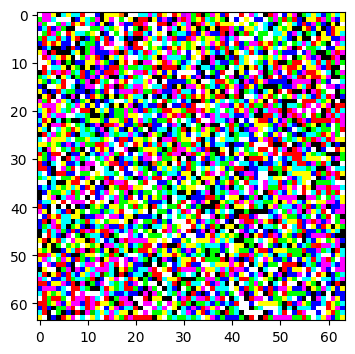

In [ ]:
# Example of a picture
plt.imshow(X_gen[0])


In [ ]:
sample = train_x_orig[0]
sample.shape

(64, 64, 3)